In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings(action='ignore')

/kaggle/input/diabetes-data-set/diabetes.csv


# Formato da base de dados:

In [2]:
import pandas as pd

dataset = pd.read_csv("/kaggle/input/diabetes-data-set/diabetes.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
dataset.shape

(768, 9)

O dataset tem o formato de tabela com 768 registros com 9 colunas

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


O dataset é composto pelas colunas:
* Pregnancies: Número de vezes grávida
* Glucose: Concentração de glicose plasmática a 2 horas em um teste de tolerância oral à glicose
* BloodPressure: Pressão arterial diastólica (mm Hg)
* SkinThickness: Espessura da prega cutânea do tríceps (mm)
* Insulin: Insulina sérica de 2 horas (mu U/ml)
* BMI: Índice de massa corporal (peso em kg/(altura em m)^2)
* DiabetesPedigreeFunction: Função de pedigree do diabetes
* Age: Idade (anos)
* Outcome (variavel target): Variável de classe (0 ou 1)

# EDA

In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Verificar a existencia de valores nulos

In [6]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Aparentemente o dataset não tem nenhum valor nulo

## Distribuição dos dados

In [7]:
total = len(dataset)
diabetics = dataset[dataset['Outcome'] == 1].Outcome.count()
nonDiabetics = dataset[dataset['Outcome'] == 0].Outcome.count()

print(f"\nTotal de registros: {total}")
print(f"Diabeticos: {diabetics}")
print(f"Não Diabeticos: {nonDiabetics}")


Total de registros: 768
Diabeticos: 268
Não Diabeticos: 500


### Visualização gráfica da distribuição:

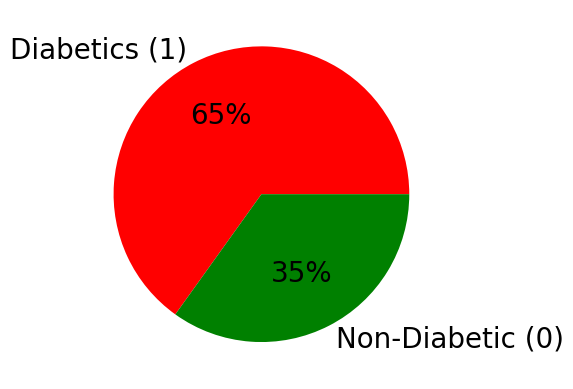

In [8]:
import matplotlib.pyplot as plt

colors = ['red', 'green']
labels = ['Diabetics (1)', 'Non-Diabetic (0)']

plt.pie(dataset['Outcome'].value_counts(), labels=labels, colors=colors, autopct='%1.0f%%', textprops={'fontsize': 20})
plt.show()

## Analise das features

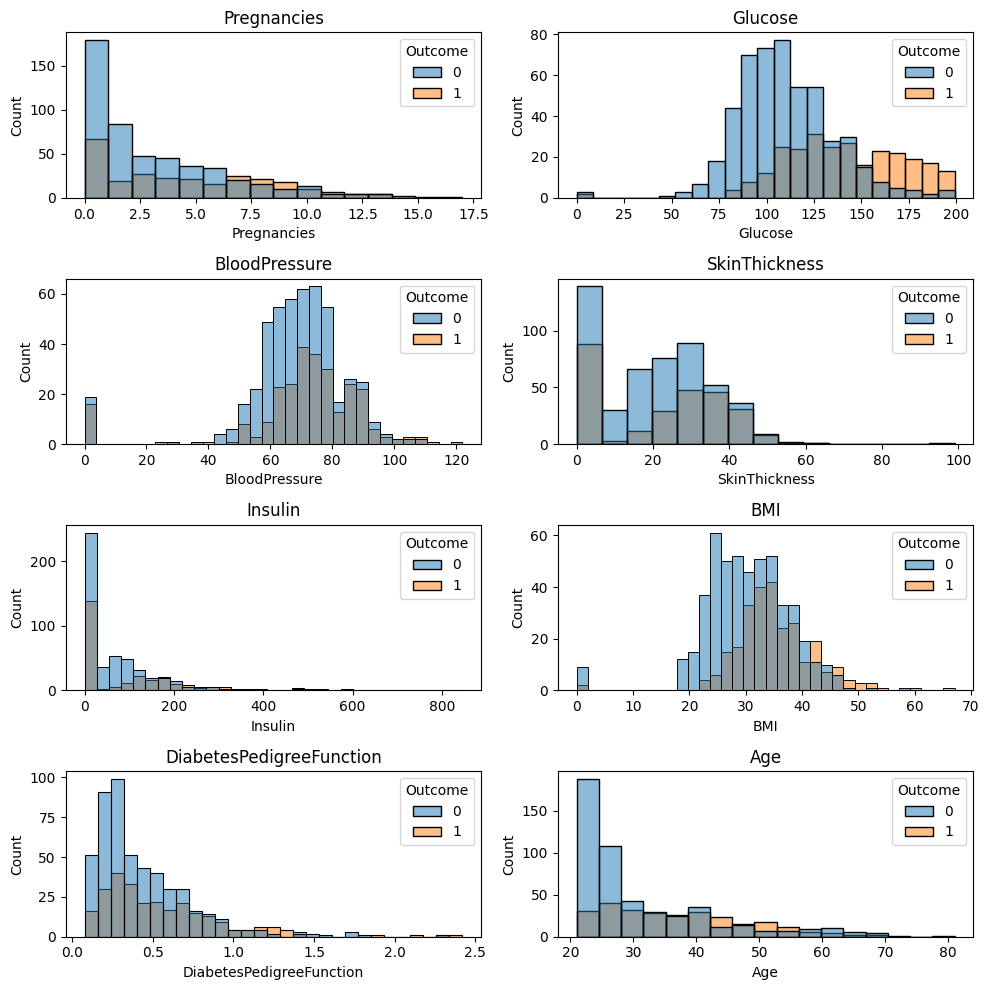

In [9]:
import seaborn as sns

feature_names = [cname for cname in dataset.loc[:,:'Age'].columns]
plt.figure(figsize = (10,10))

i = 1
for feature in feature_names:
    plt.subplot(4,2,i)
    plt.title(feature)
    sns.histplot(x=feature, data = dataset, hue="Outcome")
    i = i + 1
plt.tight_layout()
plt.show()

### Correlação entre as Features

<Axes: >

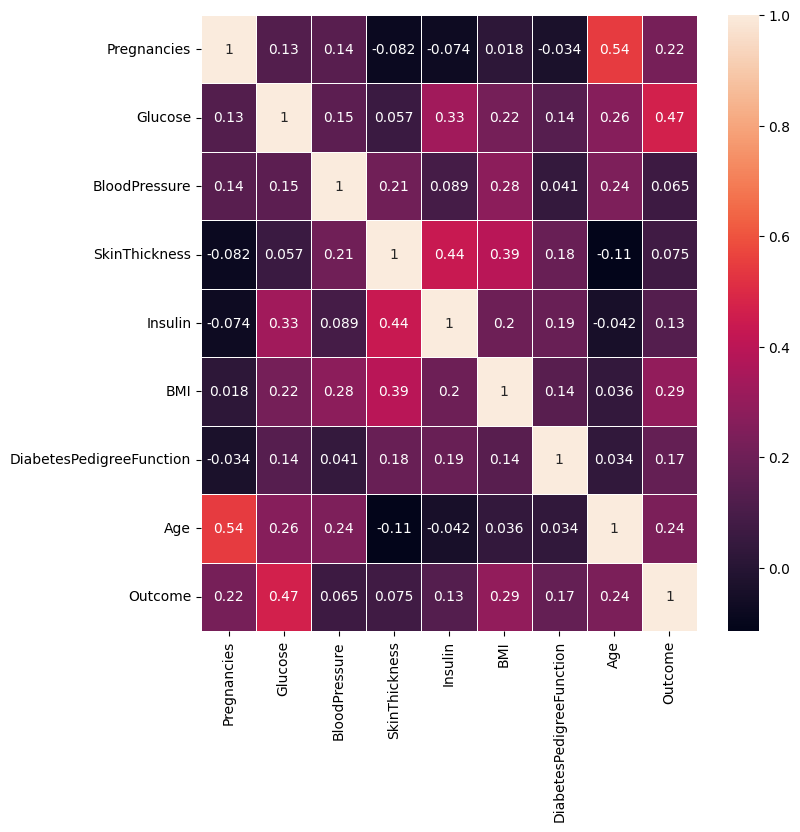

In [10]:
correlation = dataset.corr()

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation, annot=True, linewidths=.5, ax=ax)

# Criação do Modelo

## Separação da base de treino e teste

In [11]:
from sklearn.model_selection import train_test_split

x = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7) #20% para teste e 

## Configurar o modelo

In [12]:
from sklearn.neighbors import KNeighborsClassifier

error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

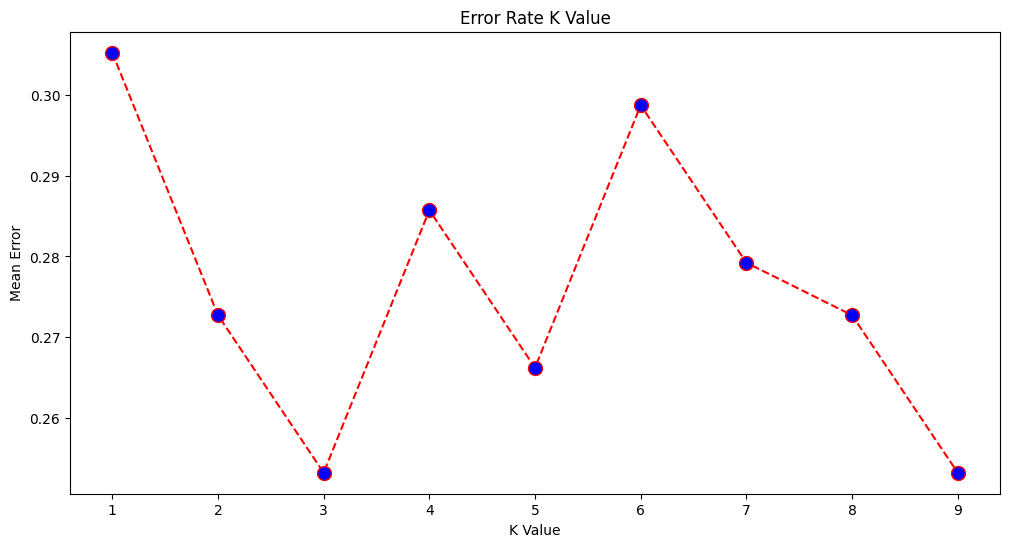

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [14]:
modelo_classificador = KNeighborsClassifier(n_neighbors=9)

In [15]:
modelo_classificador.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [16]:
y_predicted = modelo_classificador.predict(x_test)

In [17]:
print('Training set score: {:.4f}'.format(modelo_classificador.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(modelo_classificador.score(x_test, y_test)))

Training set score: 0.7720
Test set score: 0.7468


In [18]:
from sklearn.metrics import accuracy_score

# Acurácia do modelo
print(accuracy_score(y_test, y_predicted))

0.7467532467532467
